In [1]:
import torch
from utils.dataloader import create_dataloader, create_dataset
from utils.utils import visualize_multispectral_images
from utils.utils import sorted_file_paths, find_latest_checkpoint
from models.resnet import load_resnet_model, register_model_with_hook
from visualization.lots import LOTS, calculate_activation_map

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load test files

In [2]:
test_files = sorted_file_paths('./data/test_records_with_land_cover/test')
test_dataset = create_dataset(test_files)
test_loader = create_dataloader(test_dataset, 64)

experiments = [['L2', './experiments/ex_8/']]

# Load trained model

In [41]:
model = load_resnet_model()
checkpoint = find_latest_checkpoint(experiments[0][1])
print(checkpoint)
statedict = torch.load(checkpoint)
model.load_state_dict(statedict)
model.eval()
model = model.to(device)
get_feature_maps = register_model_with_hook(model)

./experiments/ex_8\checkpoint_epoch_17.pth


# Select an image, calculate its adversarial sample with target feature vector 0

In [9]:
image, _, _ = next(iter(test_loader))
imageinit = image[25, :24, :, :].unsqueeze(0)
imageadv, distance = LOTS(imageinit, 50, model, get_feature_maps, device, alpha=1)
activation_map = calculate_activation_map(imageinit.squeeze(), imageadv.squeeze(), filter_size=5, with_normalize=True)

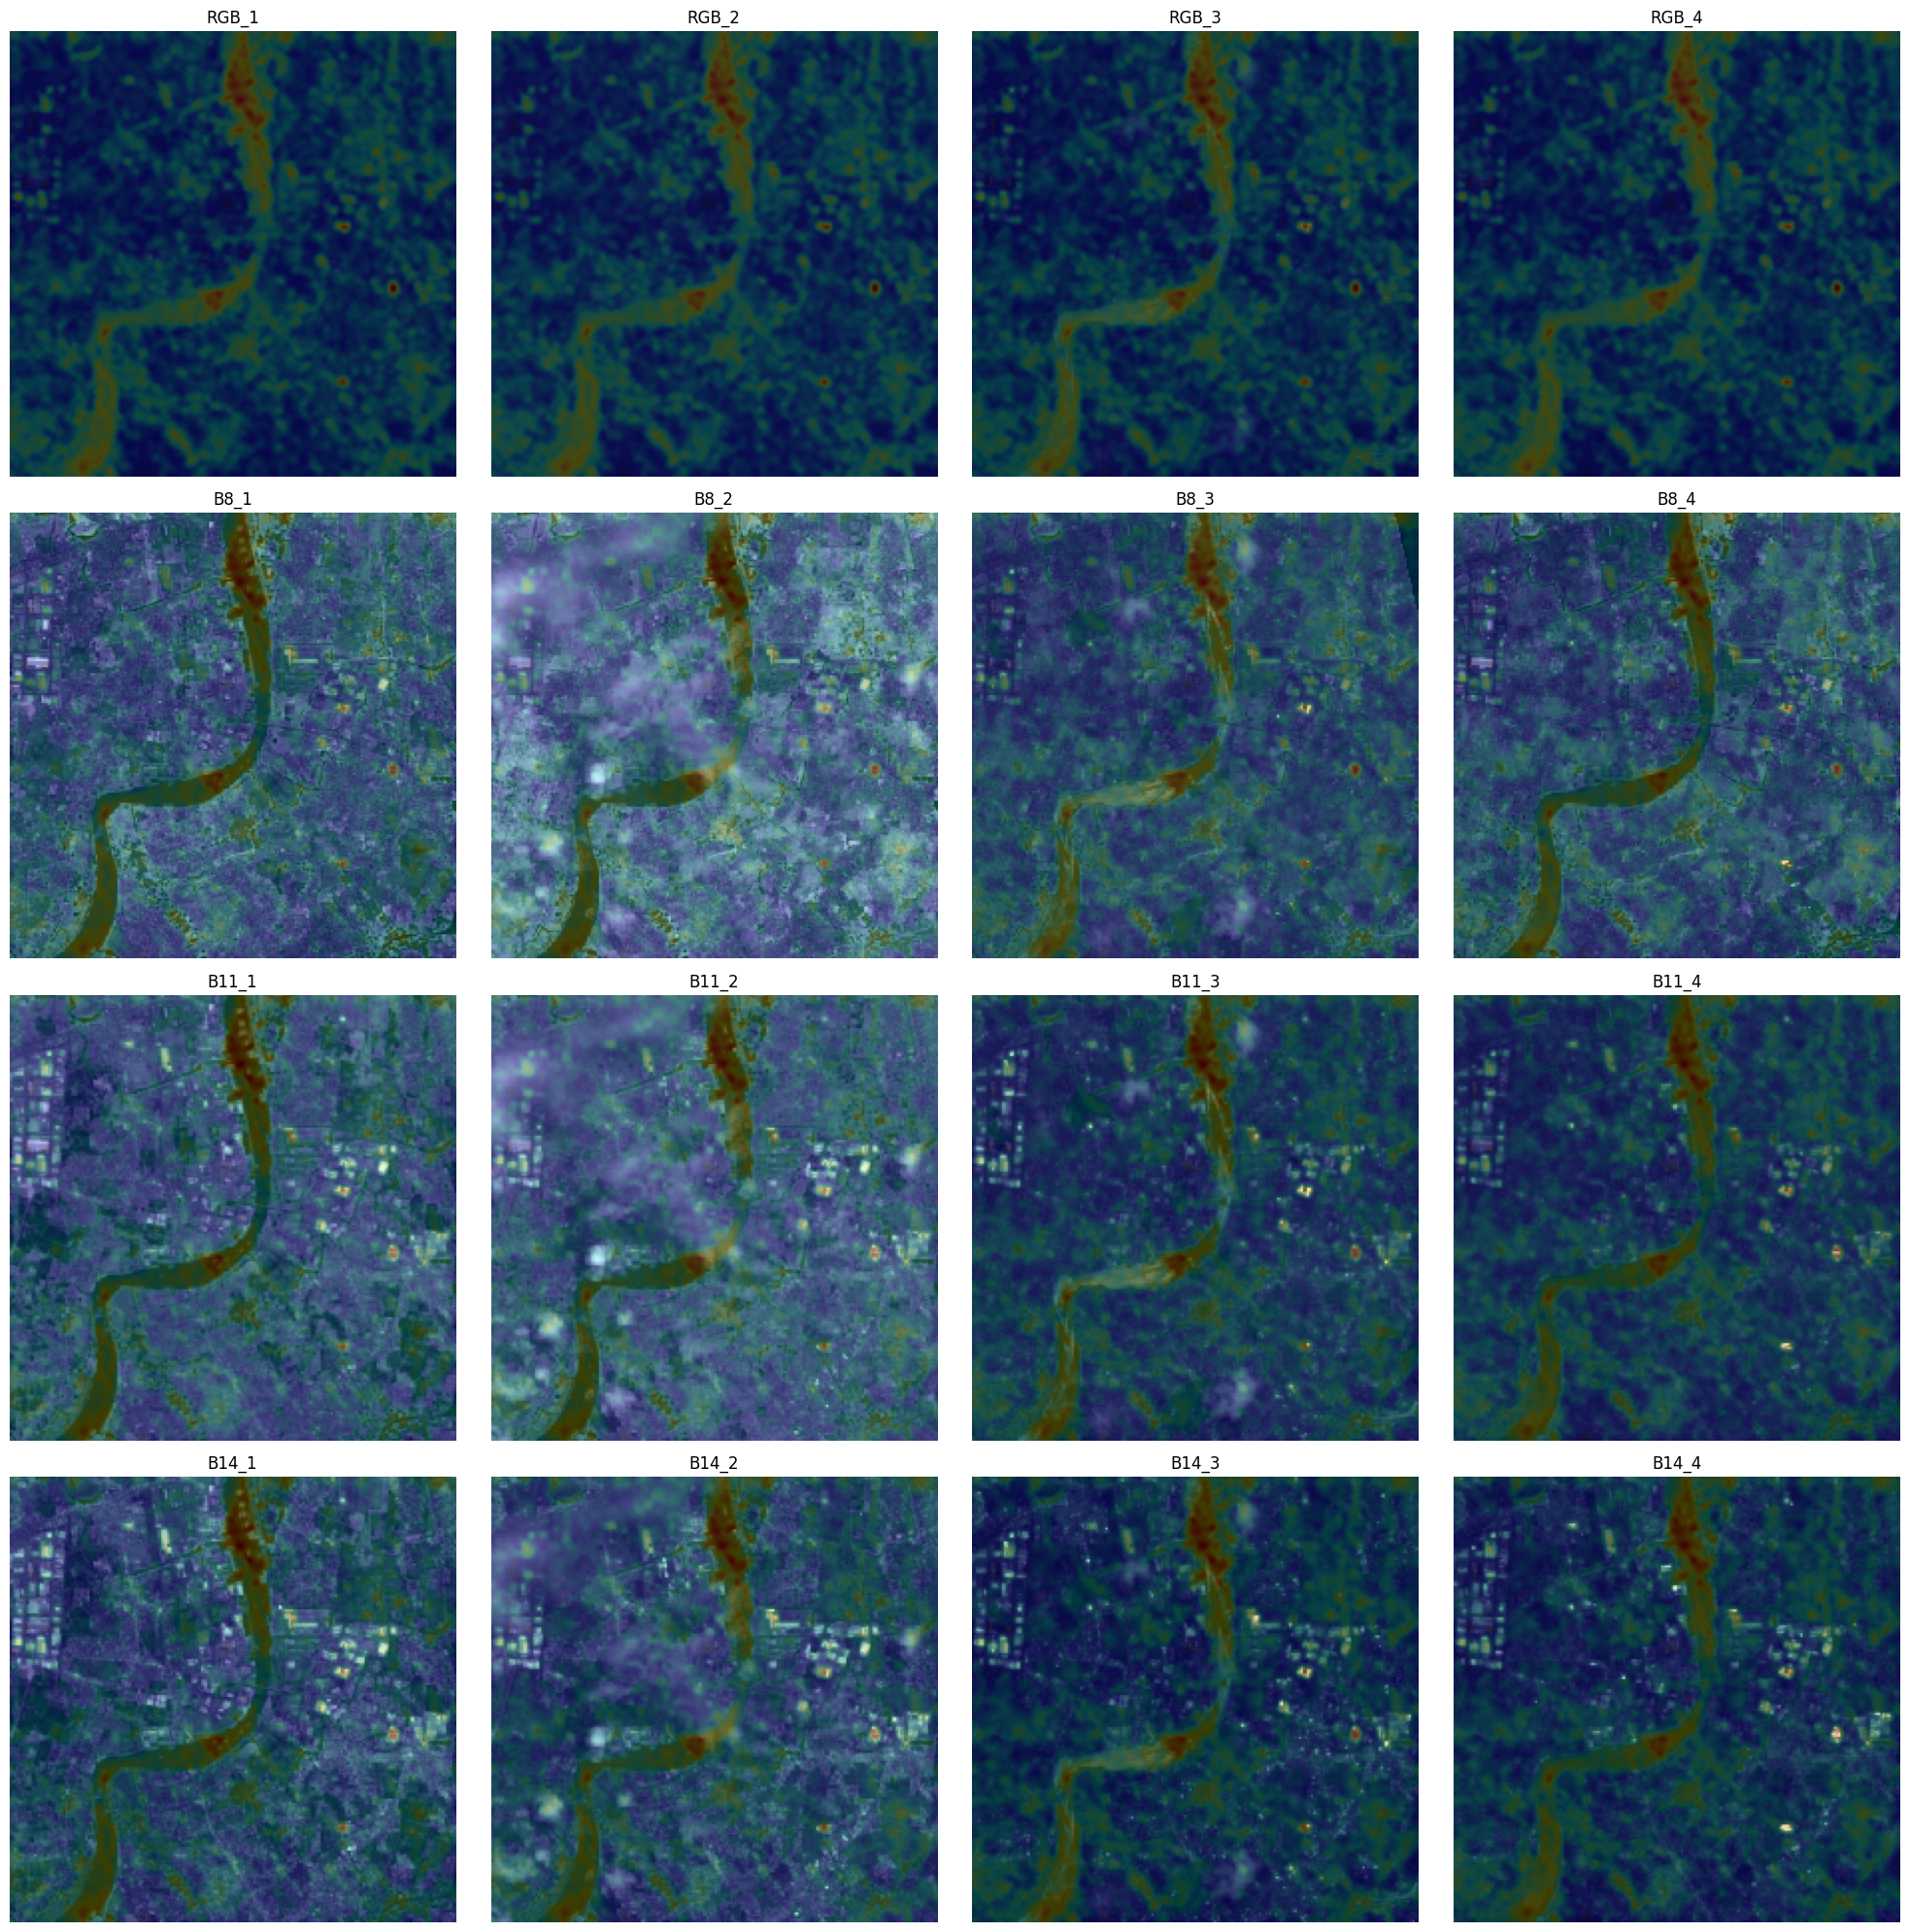

In [44]:
visualize_multispectral_images(imageinit, 0.25,heatmap=activation_map)